In [1]:
import numpy as np
from pymcaspec import specfile
from pymcaspec.utils import (calculate_dEdChan, bin_RIXS, bin_mythen,
                             clean_mythen_data,construct_E_M, get_merixE)
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib nbagg

# Define files to read in

In [2]:
scan_no = 447
filestem = '20March2018'
filename = '{}.scan{}.MYT'.format(filestem, scan_no)
F = specfile(filename)

# The processed file is also read in just for a check
F_processed = specfile('{}.spm3'.format(filestem)) 

# All parameters here 
Unless otherwise specified Energy in keV distance in mm

In [3]:
# Analyzer related
a = 5.4309 # lattice constant Si in Ang
d = a/np.sqrt(1**2+1**2+7**2) # d spacing in Ang

analyzer_info = dict(d=d,  # d spacing in Ang
                    R=1000, # analyzer radius in mm
                    edgeEn=8.335 # resonant energy in keV
                    )

magicchannel = 1050
min_chan = magicchannel - 50
max_chan = magicchannel + 50
threshold = 1000 # throw away values above this

monitor = 'i2' # name of monitor to use

# Use Analyzer properties for Si(8 4 4)
to compute energy per channel

In [4]:
dEdchan = calculate_dEdChan(**analyzer_info)

# Read data

In [5]:
mythen_dataset = F.get_all_MCA()
central_Es = get_merixE(F)
central_Ms = np.array([F[key][monitor][0] for key in F.keys()])
S_processed = F_processed[scan_no]

In [6]:
E, I, M = bin_RIXS(central_Es, central_Ms, mythen_dataset,
    magicchannel,
    dEdchan, min_chan, max_chan, threshold,
    binstep=dEdchan)

Text(0, 0.5, 'Count/monitor')

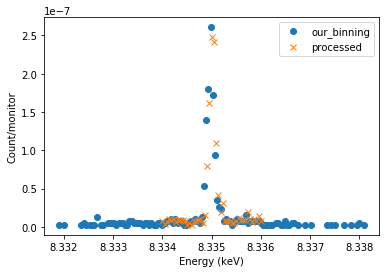

In [7]:
fig, ax = plt.subplots()

ax.plot(E, I/M, 'o', label='our_binning')

ax.plot(S_processed[0], S_processed['C']/S_processed['M'], 'x', label='processed')

ax.legend()
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Count/monitor')